In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [19]:
TRAINING_DIR = '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Train'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range = 0.01, # Randomly zoom image 
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=False,  # randomly flip images
                                   vertical_flip=False  
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64),
                                                    )

Found 115500 images belonging to 84 classes.


In [20]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Test',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 22260 images belonging to 84 classes.


In [21]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Validation',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 24780 images belonging to 84 classes.


In [22]:
import os 
import warnings
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers, activations

In [23]:

classifier=Sequential()

classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu", input_shape=(64,64,3)))
classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.25))

classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())  
classifier.add(Dropout(.25))  

classifier.add(Conv2D(filters=256, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.25))
    
classifier.add(Flatten())

classifier.add(Dense(512,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(256,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(128,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dropout(.25))
    
classifier.add(Dense(84,activation="softmax"))




In [24]:
classifier.compile(loss='categorical_crossentropy', 
                metrics=['accuracy'],
                optimizer=Adam(learning_rate=0.00004))

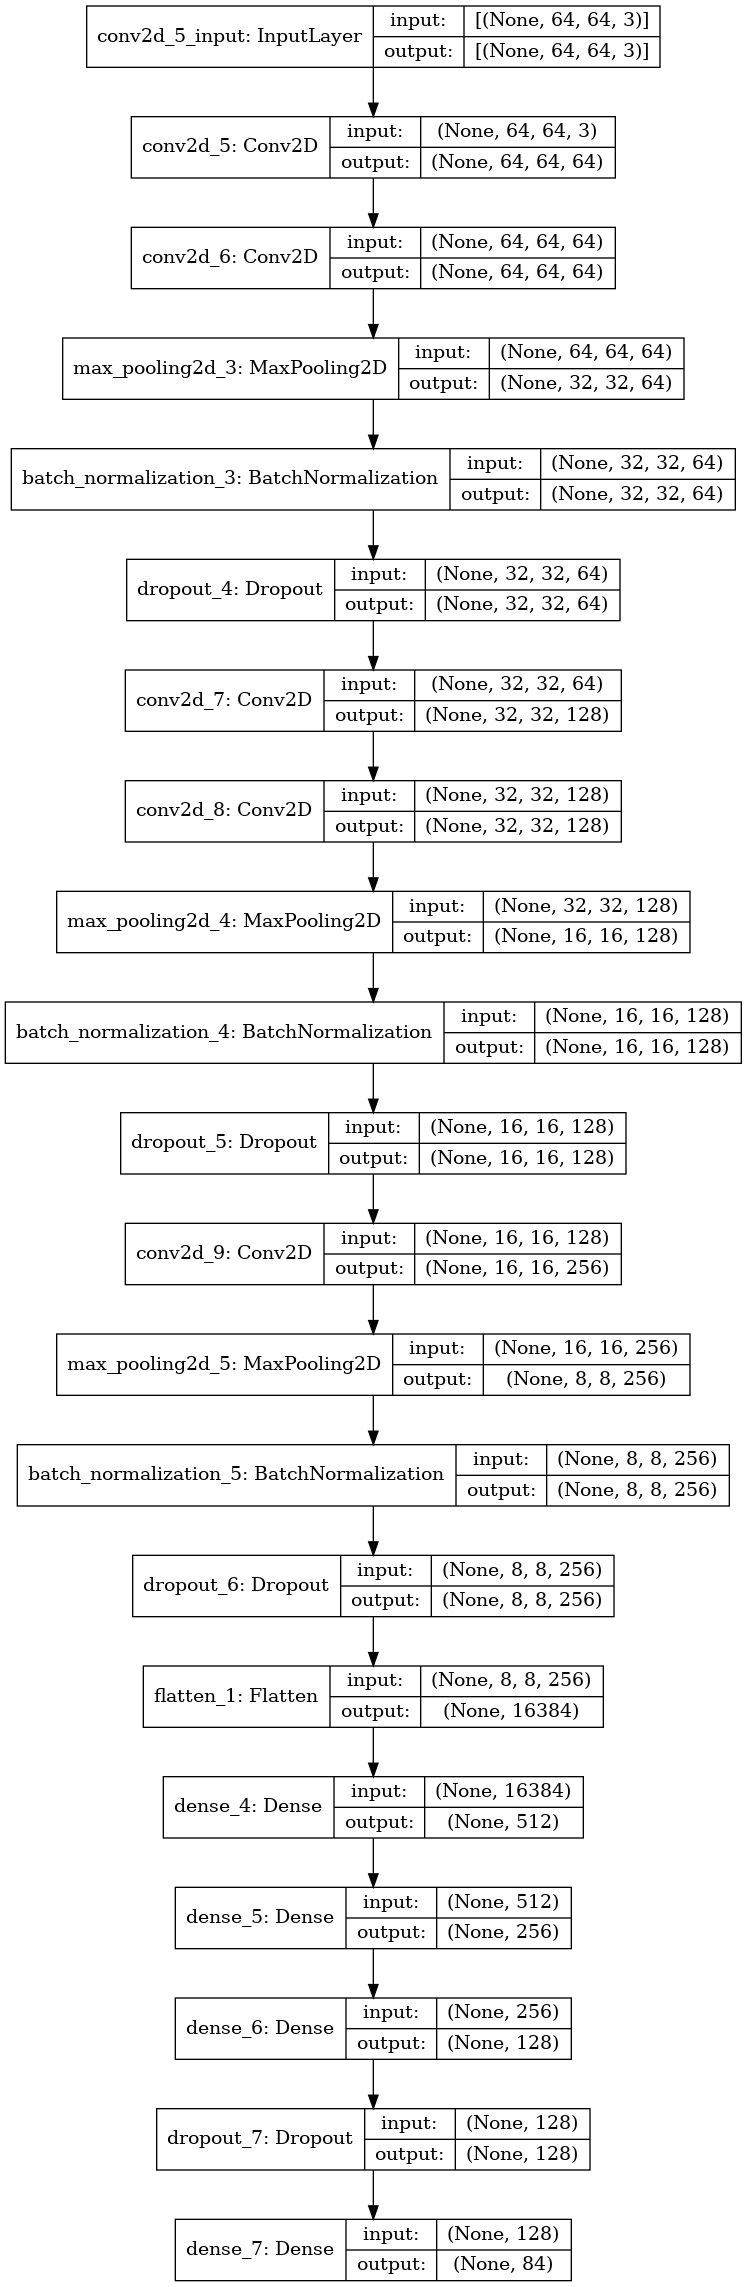

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, 'Architecture.png', show_shapes=True)

In [26]:
#Details for model
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)      

In [27]:
"""
from google.colab import files
files.download('Architecture.png')
"""

"\nfrom google.colab import files\nfiles.download('Architecture.png')\n"

In [28]:
filepath = "Final_Model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [29]:
history = classifier.fit(train_generator,steps_per_epoch = len(train_generator), epochs = 50,
                        validation_data = val_generator, validation_steps =  len(val_generator),callbacks=callbacks_list)

Epoch 1/50
903/903 [==============================] - 276s 305ms/step - loss: 4.7046 - accuracy: 0.2356 - val_loss: 2.9925 - val_accuracy: 0.6029

Epoch 00001: val_loss improved from inf to 2.99249, saving model to Final_Model.h5
Epoch 2/50
903/903 [==============================] - 274s 303ms/step - loss: 3.2877 - accuracy: 0.5054 - val_loss: 2.3228 - val_accuracy: 0.7474

Epoch 00002: val_loss improved from 2.99249 to 2.32276, saving model to Final_Model.h5
Epoch 3/50
903/903 [==============================] - 273s 302ms/step - loss: 2.7667 - accuracy: 0.6150 - val_loss: 2.0854 - val_accuracy: 0.7855

Epoch 00003: val_loss improved from 2.32276 to 2.08544, saving model to Final_Model.h5
Epoch 4/50
903/903 [==============================] - 273s 302ms/step - loss: 2.4578 - accuracy: 0.6771 - val_loss: 1.9130 - val_accuracy: 0.8143

Epoch 00004: val_loss improved from 2.08544 to 1.91300, saving model to Final_Model.h5
Epoch 5/50
903/903 [==============================] - 276s 306ms/ste

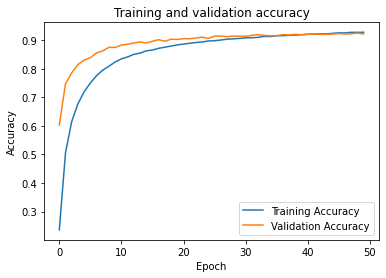

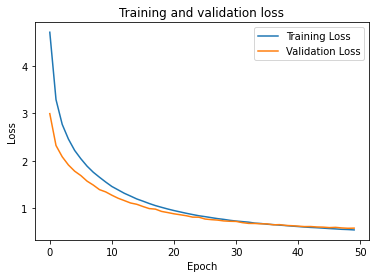

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

**Prediction **

In [34]:
loss_t, accuracy_t = classifier.evaluate(train_generator, steps=128)
loss, accuracy = classifier.evaluate(test_generator,steps=128)
loss_v, accuracy_v = classifier.evaluate(val_generator, steps=128)
print("\nTrain: accuracy = %f  ;  loss_v = %f\n" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  ;  loss_v = %f\n" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f\n" % (accuracy, loss))


128/128 [==============================] - 16s 126ms/step - loss: 0.5888 - accuracy: 0.9208

Train: accuracy = 0.942566  ;  loss_v = 0.496965

Validation: accuracy = 0.920776  ;  loss_v = 0.588776

Test: accuracy = 0.926636  ;  loss = 0.559758

